In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

In [73]:
pd.set_option('display.max_columns',100)

In [4]:
pd.set_option('display.max_rows',500)

In [130]:
# sample test
from maio import keywordTrend as kt
ktrend = kt('의자')
tkwd = ktrend.tkwds

In [131]:
tkwd['h_sch'] = 2 / ( (1/tkwd['sch']) + (1/tkwd['mob_sch']) ) 
tkwd['h_clk'] = 2 / ( (1/tkwd['click']) + (1/tkwd['mob_click']) ) 
tkwd['h_clk_r'] = 2 / ( (1/tkwd['clk_r']) + (1/tkwd['mob_clk_r']) ) 

In [112]:
tkwd.sort_values(['h_sch'],ascending=False)[:10]

,relkeyword,sch,mob_sch,click,mob_click,clk_r,mob_clk_r,num_ads,comp,h_sch,h_clk,h_clk_r
27,우체국택배,165700,408200,184.7,48.8,0.12,0.02,4,0,235716.117791,77.202227,0.034286
15,우체국쇼핑몰,64100,175100,650.0,983.0,1.06,0.58,1,0,93845.401338,782.547459,0.749756
28,설선물,49500,157800,200.7,1047.4,0.42,0.69,15,2,75360.347323,336.853105,0.522162
33,명절선물,28500,87900,97.5,510.7,0.35,0.60,15,2,43043.814433,163.739724,0.442105
9,한우선물세트,25000,96600,455.5,4653.0,1.86,4.92,15,2,39720.394737,829.770578,2.699469
0,홍삼,22800,109300,84.7,614.8,0.39,0.59,15,2,37729.598789,148.887949,0.469592
35,선물세트,21300,45800,88.6,431.7,0.43,0.97,15,2,29077.198212,147.025255,0.595857
24,한우,15900,87500,261.5,2760.8,1.71,3.28,15,2,26910.058027,477.748205,2.248016
21,우체국인터넷뱅킹,31100,5370,24.0,0.0,0.09,0.00,1,0,9158.596106,0.000000,0.000000
11,건강기능식품,7560,9240,27.7,51.3,0.39,0.60,15,2,8316.000000,35.974937,0.472727


<AxesSubplot:ylabel='h_sch'>

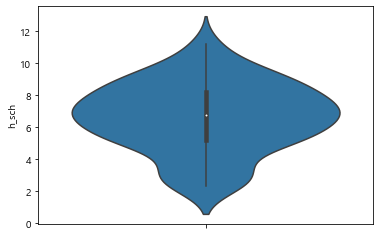

In [162]:
sns.violinplot(y=np.log(tkwd.h_sch))

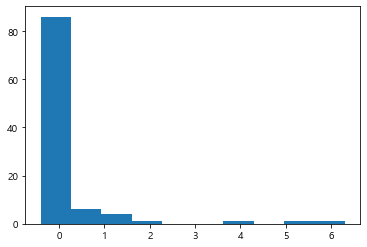

In [168]:
rs = plt.hist( tkwd.h_sch_std )

In [132]:
# Standardization
from sklearn import preprocessing
for X in ['h_sch','h_clk'] :
    tkwd['%s_std'%X] = preprocessing.StandardScaler() \
                                    .fit(tkwd[X].to_numpy().reshape(-1,1) ) \
                                    .transform(tkwd[X].to_numpy().reshape(-1,1) )

In [108]:
def stripOutlier(df,cols,strength=1):
    
    for col in cols :
        q75 = df[col].quantile(q=0.75)
        q25 = df[col].quantile(q=0.25)
        iqr = q75 - q25
        rbound = q75 + 1.5*strength
        lbound = q25 - 1.5*strength
        
        df = df.drop(index = df[ ( lbound > tkwd[col]) | (tkwd[col] > rbound) ].index)
        
    return df

In [133]:
tkwdo = stripOutlier(tkwd,['h_sch_std','h_clk_std'])

c:\users\epsilon\dev\anaconda\envs\kera\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


(-1.0, 10.0)

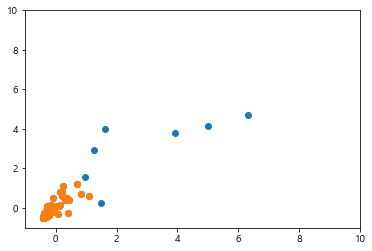

In [134]:
# iqr outliers
plt.scatter(tkwd.h_sch_std,tkwd.h_clk_std)
plt.scatter(tkwdo.h_sch_std,tkwdo.h_clk_std)
plt.xlim(-1,10)
plt.ylim(-1,10)

In [84]:
# inefficient code
# strip_Outlier
cols = ['h_sch_std','h_clk_std']
strength = 1

filt_df = []
for col in cols :
    q75 = tkwd[col].quantile(q=0.75)
    q25 = tkwd[col].quantile(q=0.25)
    iqr = q75 - q25
    rbound = q75 + 1.5*strength
    lbound = q25 - 1.5*strength
    filt_df.append( tkwd[ ( lbound < tkwd[col]) & (tkwd[col]<rbound) ] )

df = pd.merge(*filt_df)

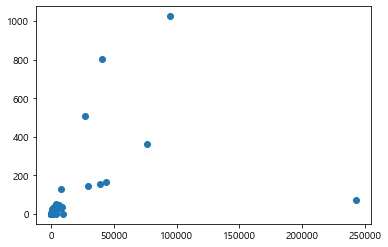

In [6]:
# extremely low click rate, high searching
# keyword domain ; srch too high , many meaningless searching
plt.scatter(tkwd.h_sch,tkwd.h_clk)

In [ ]:
#### detecting outliers and removing them 
#### dimensinality-reduction : pca,some projection(weight) , linear regression

## pca 
## auto deteminant of the num of features

In [ ]:
from sklearn.decomposition import PCA
comp_n = 2
pca = PCA(n_components=comp_n) # 주성분을 몇개로 할지 결정
cols = []
for x in range(comp_n):
    cols.append('comp_%d'%x)
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents, columns = cols)